In [1]:
# Brain Function Activity Analysis on a fMRI Dataset to validate the Brain Mapping/Finger Printing Test
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

In [3]:
!pip install split-folders
import splitfolders

from google.colab import drive

drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/MRI-Preprocessed/Dataset'
splitfolders.ratio(dataset_path, output="output", seed=1345, ratio=(.8, 0.1,0.1))

Mounted at /content/drive


Copying files: 6400 files [02:05, 50.89 files/s] 


In [4]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


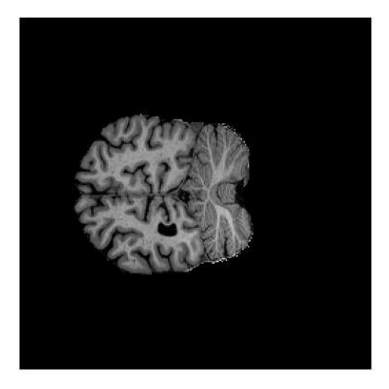

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('image_67.jpg')  # Replace 'your_image.jpg' with the image file path

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [11]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
80/80 [==============================] - 64s 768ms/step - loss: 1.4547 - accuracy: 0.4921 - val_loss: 1.0139 - val_accuracy: 0.5415
Epoch 2/100
80/80 [==============================] - 53s 658ms/step - loss: 0.9566 - accuracy: 0.5312 - val_loss: 0.9235 - val_accuracy: 0.6103
Epoch 3/100
80/80 [==============================] - 53s 657ms/step - loss: 0.9103 - accuracy: 0.5694 - val_loss: 0.8318 - val_accuracy: 0.6385
Epoch 4/100
80/80 [==============================] - 53s 656ms/step - loss: 0.8419 - accuracy: 0.6118 - val_loss: 0.8150 - val_accuracy: 0.6072
Epoch 5/100
80/80 [==============================] - 51s 643ms/step - loss: 0.7834 - accuracy: 0.6476 - val_loss: 0.7189 - val_accuracy: 0.6823
Epoch 6/100
80/80 [==============================] - 53s 658ms/step - loss: 0.7211 - accuracy: 0.6878 - val_loss: 0.6258 - val_accuracy: 0.7621
Epoch 7/100
80/80 [==============================] - 53s 662ms/step - loss: 0.6146 - accuracy: 0.7339 - val_loss: 0.5552 - val_accuracy:

In [12]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

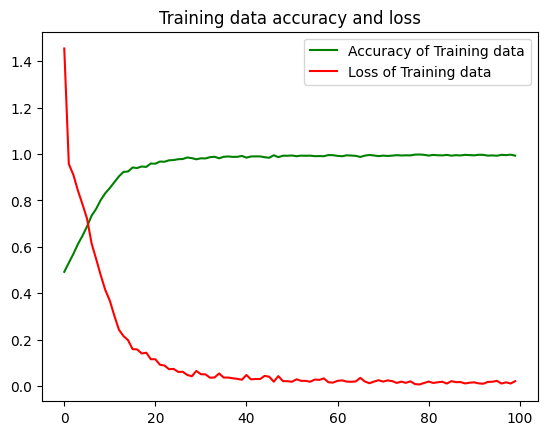

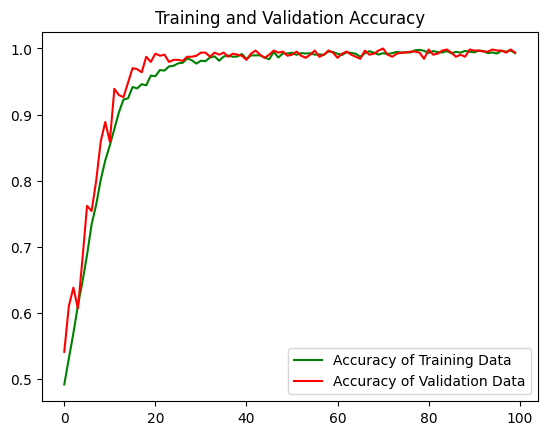

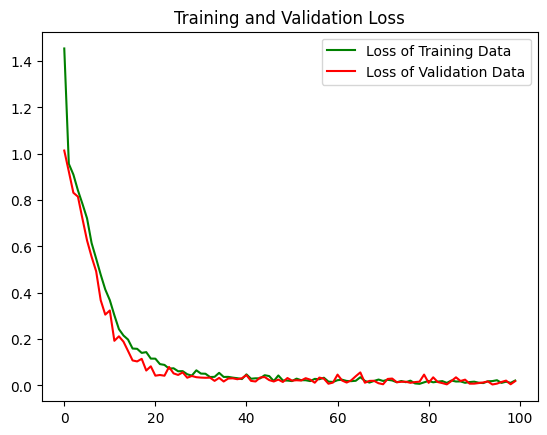

<Figure size 640x480 with 0 Axes>

In [13]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [14]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 2s 151ms/step - loss: 0.0180 - accuracy: 0.9953
